In [1]:
from sklearn.base import BaseEstimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Accuracy

titanic 생존자들의 성별에 따른 생존 예측을 위한 커스텀 분류 분석 클래스를 정의함.

In [2]:
class MyDummyClassifier(BaseEstimator):
    # fit() : do nothing
    def fit(self, X, y=None):
        pass
    #predict() : 성별에 따라 0,1로 결과를 반환
    # 남자는 1로, 여자는 0으로 인코딩된다. 남자일 땐 무조건 사망(0)으로 예측하고 여자일 땐 무조건 생존(1)으로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0],1)) # (X의 행개수 * 1열) 짜리 2차원 배열 생성
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

데이터 전처리 함수 정의

In [3]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

train, test data 분리

In [4]:
titanic_df = pd.read_csv('../../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                   test_size=0.2,random_state=1)

학습, 예측 수행

In [5]:
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는 : 0.7765


Accuracy는 데이터 구성에 영향을 많이 받는 평가지표이다.
따라서 불균형(imbalanced)한 레이블 값 분포에서는 부정확

In [6]:
### MNIST Dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [7]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [8]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)

In [10]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)

In [11]:
accuracy_score(y_test, fakepred)

0.9

## Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## get_clf_eval()

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('Precision: {:.4f}, Recall: {:.4f}, Accuracy: {:.4f}'.format(precision,recall,accuracy))

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [15]:
titanic_df = pd.read_csv('../../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

In [16]:
print(len(X_train),len(y_train))

712 712


In [17]:
lr_clf.fit(X_train,y_train)
lr_clf_pred = lr_clf.predict(X_test)

In [18]:
get_clf_eval(y_test,lr_clf_pred)

오차행렬
[[108  10]
 [ 14  47]]
Precision: 0.8246, Recall: 0.7705, Accuracy: 0.8659


## 정밀도, 재현율의 Trade-off 관계

In [19]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('테스트 데이터 개수:',X_test.shape[0])
print("pred_proba() 결과 shape :",pred_proba.shape)
print("pred_proba array의 앞에서 3개 요소:",pred_proba[:3])

테스트 데이터 개수: 179
pred_proba() 결과 shape : (179, 2)
pred_proba array의 앞에서 3개 요소: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]


In [20]:
from sklearn.preprocessing import Binarizer

X= [[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [22]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
Precision: 0.8246, Recall: 0.7705, Accuracy: 0.8659


In [23]:
custom_threshold2 = 0.4
pred_proba2 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold2).fit(pred_proba2)
custom_predict2 = binarizer.transform(pred_proba2)

get_clf_eval(y_test,custom_predict2)

오차행렬
[[97 21]
 [11 50]]
Precision: 0.7042, Recall: 0.8197, Accuracy: 0.8212


결정 임계값 바꿔가며 확인하기

In [29]:
thresholds = [0.4,0.45,0.50,0.55,0.60]
def get_eval_by_threshold(y_test,pred_proba,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_pred = binarizer.transform(pred_proba)
        print("임곗값:",custom_threshold)
        print('TP의 수:',confusion_matrix(y_test,custom_pred)[1,1])
        get_clf_eval(y_test,custom_pred)

In [30]:
get_eval_by_threshold(y_test,pred_proba_1,thresholds)

임곗값: 0.4
TP의 수: 50
오차행렬
[[97 21]
 [11 50]]
Precision: 0.7042, Recall: 0.8197, Accuracy: 0.8212
임곗값: 0.45
TP의 수: 48
오차행렬
[[105  13]
 [ 13  48]]
Precision: 0.7869, Recall: 0.7869, Accuracy: 0.8547
임곗값: 0.5
TP의 수: 47
오차행렬
[[108  10]
 [ 14  47]]
Precision: 0.8246, Recall: 0.7705, Accuracy: 0.8659
임곗값: 0.55
TP의 수: 45
오차행렬
[[111   7]
 [ 16  45]]
Precision: 0.8654, Recall: 0.7377, Accuracy: 0.8715
임곗값: 0.6
TP의 수: 44
오차행렬
[[113   5]
 [ 17  44]]
Precision: 0.8980, Recall: 0.7213, Accuracy: 0.8771


precision_recall_curve()함수로 간편하게 확인

In [31]:
from sklearn.metrics import precision_recall_curve
# 레이블 값을 1로 예측할 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:',thresholds.shape)

반환된 분류 결정 임곗값 배열의 Shape: (147,)


In [37]:
# prc 함수로 반환된 thresholds ndarray는 너무 커서 15단위로 건너뛰며 확인
thr_index = np.arange(0,thresholds.shape[0],15) 
print('10개의 샘플 임곗값:',np.round(thresholds[thr_index],2))
print('샘플 임계값별 정밀도:',np.round(precisions[thr_index],2))
print('샘플 임계값별 재현율:',np.round(recalls[thr_index],2))

10개의 샘플 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도: [0.38 0.42 0.45 0.52 0.62 0.68 0.8  0.93 0.96 1.  ]
샘플 임계값별 재현율: [1.   0.97 0.9  0.9  0.9  0.82 0.77 0.66 0.44 0.21]


In [38]:
# 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(6,4))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:thresholds_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:thresholds_boundary],label='recall')
    
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

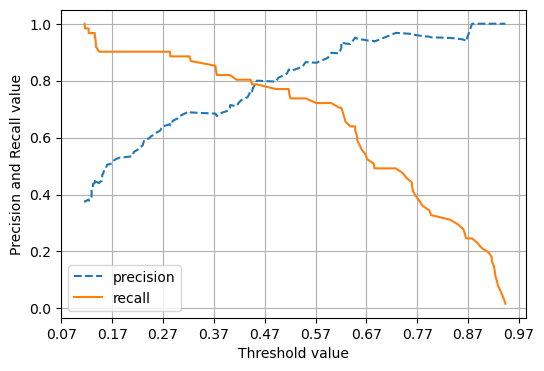

In [39]:
precision_recall_curve_plot(y_test,pred_proba_class1)

## ROC AUC

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)

In [47]:
thresholds

array([1.94326279, 0.94326279, 0.94040085, 0.93261004, 0.87778554,
       0.86565305, 0.72771397, 0.68584875, 0.64779433, 0.63856712,
       0.62629696, 0.62067109, 0.61651659, 0.60096648, 0.57135186,
       0.55064775, 0.52051719, 0.51724752, 0.49209942, 0.454472  ,
       0.44497249, 0.44222415, 0.41445142, 0.40194454, 0.37571831,
       0.32202995, 0.28441583, 0.283459  , 0.23280098, 0.22996172,
       0.14927478, 0.14927303, 0.14423595, 0.13866563, 0.13821237,
       0.13664489, 0.13574049, 0.13571   , 0.13196918, 0.13174371,
       0.12941902, 0.12934056, 0.12904511, 0.12350958, 0.1234948 ,
       0.11636722, 0.11573102, 0.01974988])

In [45]:
thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 임곗값:',thresholds[thr_index])
print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],2))
print('샘플 임곗값별 TPR:',np.round(tprs[thr_index],2))

샘플 임곗값: [0.94326279 0.72771397 0.62067109 0.52051719 0.44222415 0.28441583
 0.14927303 0.13574049 0.12934056 0.11573102]
샘플 임곗값별 FPR: [0.   0.01 0.03 0.08 0.13 0.25 0.58 0.61 0.75 0.85]
샘플 임곗값별 TPR: [0.02 0.49 0.7  0.74 0.8  0.89 0.9  0.95 0.97 1.  ]


In [55]:
# roc 시각화
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    # y=x 직선
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR( 1-Specificity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

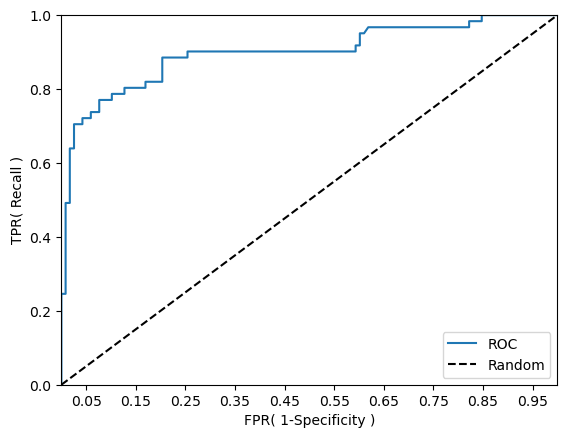

In [56]:
roc_curve_plot(y_test,pred_proba_class1)

In [58]:
roc_auc_score(y_test,pred_proba_class1)

0.8986524034454015